In [1]:
from scipy import stats

In [2]:
from sklearn import metrics

In [3]:
import matplotlib.pyplot as plt

In [4]:
import sklearn as sk

In [5]:
import pandas as pd

In [6]:
import math

In [7]:
import numpy as np

In [8]:
csv = pd.read_csv('./ocean157ksafe.csv', ',')

In [9]:
generos = {
    "1": "Mujer",
    "2": "Varón",
    "3": "No binarie",
    "4": "Género fluido",
    "5": "Ninguna de estas opciones me identifica",
    "6": "Prefiero no decirlo"
}

renames = {
    '1_extraversion': "Extroversión",
    '1_agreeableness': "Agradabilidad",
    '1_conscientiousness': "Responsabilidad",
    '1_neuroticism': "Neuroticismo",
    '1_openness': "Apertura a la experiencia",
    "2_genero": "Género",
}

traits = [
    "Extroversión",
    "Agradabilidad",
    "Responsabilidad",
    "Neuroticismo",
    "Apertura a la experiencia"
]

gen_keys = {
    "mujer": "mujeres",
    "varón": "varones",
    "no binarie": "noBinarie",
    "género fluido": "generoFluido"
}

In [10]:
csv = csv.rename(columns=renames)

for k in generos.keys():
    csv.loc[csv["Género"] == int(k), 'Género'] = generos.get(k)

In [11]:
def getValue(gen1, gen2, trait):
    tags = []
    values = []
    
    tags = np.array(
        csv['Género'][
            (csv['Género'] == gen1) |
            (csv['Género'] == gen2)
        ]
    )
    
    f = lambda x: 1 if x == gen1 else 0
    
    tags = np.vectorize(f)(tags)
    
    values = np.array(
        csv[trait][
            (csv['Género'] == gen1) |
            (csv['Género'] == gen2)
        ]
    )
    
    gen1_values = csv[trait][csv['Género'] == gen1]
    gen2_values = csv[trait][csv['Género'] == gen2]
    
    auc = sk.metrics.roc_auc_score(
        tags,
        values
    )
    
    p = stats.mannwhitneyu(
        csv.loc[csv["Género"] == gen1][trait],
        csv.loc[csv["Género"] == gen2][trait]
    )

    porcentaje = "50%" if p.pvalue > 0.05 else f"{round(auc * 100, 1)}%"
    
    return {
        "gen1": gen1,
        "gen2": gen2,
        "trait": trait,
        "auc": porcentaje,
        "p": round(p.pvalue, 5)
    }

In [12]:
getValue("Mujer", "Varón", "Neuroticismo")

{'gen1': 'Mujer',
 'gen2': 'Varón',
 'trait': 'Neuroticismo',
 'auc': '66.2%',
 'p': 0.0}

In [13]:
getValue("Varón", "Mujer", "Neuroticismo")

{'gen1': 'Varón',
 'gen2': 'Mujer',
 'trait': 'Neuroticismo',
 'auc': '33.8%',
 'p': 0.0}

In [14]:
gs = list(generos.values())[:4]
pares = []
for g1 in gs:
    for g2 in gs:
        if g1 != g2:
            pares.append((g1, g2))

In [15]:
table_data = {
    "Mujer": {},
    "Varón": {},
    "Género fluido": {},
    "No binarie": {}
}
for g in gs:
    table_data[g] = {}
    for trait in renames.values():
        table_data[g][trait] = {}

for trait in renames.values():
    if trait != "Género":
        for gen1, gen2 in pares:
            valor = getValue(gen1, gen2, trait)
            table_data[gen1][trait][gen2] = valor["auc"]

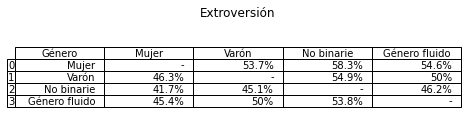

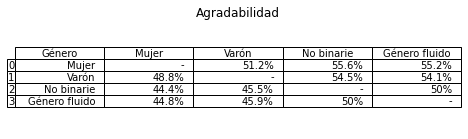

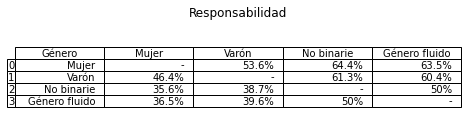

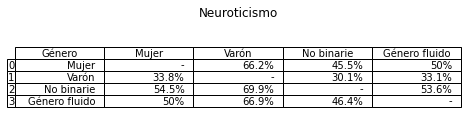

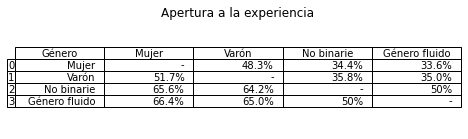

In [16]:
for trait in renames.values():
    if trait != "Género":
        valores = []
        for g in gs:
            v = [g]
            for g2 in gs:
                if g2 == g:
                    v.append("-")
                else:
                    v.append(table_data[g][trait][g2])
            valores.append(v)

        my_frame = pd.DataFrame(
            np.array(valores),
            columns=["Género", "Mujer", "Varón", "No binarie", "Género fluido"]
        )
        
        fig = plt.figure(figsize = (8, 2))
        ax = fig.add_subplot(111)

        ax.table(cellText = my_frame.values,
                  rowLabels = my_frame.index,
                  colLabels = my_frame.columns,
                  loc = "center"
                 )
        ax.set_title(trait)

        ax.axis("off")